In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
import pandas as pd
import numpy as np
df_train = pd.read_csv("digit-train.csv")
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Source: https://www.kaggle.com/c/digit-recognizer/data

In [3]:
X_train = df_train.drop(columns = "label")
y_train = df_train[["label"]]
df_test = pd.read_csv("digit-test.csv")
X_test = df_test.drop(columns = "label")
y_test = df_test[["label"]]

In [4]:
print(df_train.loc[:, df_train.isna().any()])
print(df_test.loc[:, df_test.isna().any()])
# Therefore, there is no any missing cell inside the dataframe

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[4198 rows x 0 columns]
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[4198 rows x 0 columns]


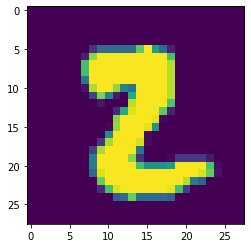

In [5]:
# visualizing
import matplotlib.pyplot as plt
image0 = df_train.iloc[3,1:]                                               
plt.imshow(np.array(image0).reshape(28,28))

In [6]:
df_train.shape, df_test.shape

((4198, 785), (4198, 785))

In [7]:
df_train.isna().sum(), df_test.isna().sum()

(label       0
 pixel0      0
 pixel1      0
 pixel2      0
 pixel3      0
            ..
 pixel779    0
 pixel780    0
 pixel781    0
 pixel782    0
 pixel783    0
 Length: 785, dtype: int64,
 label       0
 pixel0      0
 pixel1      0
 pixel2      0
 pixel3      0
            ..
 pixel779    0
 pixel780    0
 pixel781    0
 pixel782    0
 pixel783    0
 Length: 785, dtype: int64)

array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

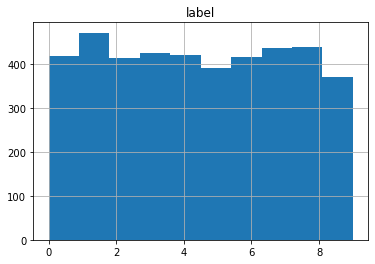

In [8]:
y_train.hist()

array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

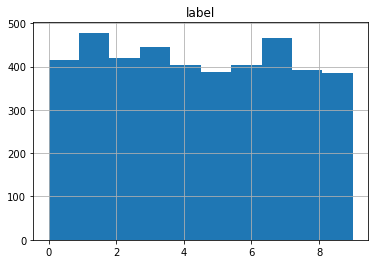

In [9]:
y_test.hist()

Because the target is multiclass, and the histogram shows the label is evenly distributed. Therefore, we choose accuracy as the metric of model evaluation. 

## Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier 
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
# from sklearn.metrics import confusion_matrix
# cmdtree = confusion_matrix(ytest,ypred)
dtree.score(X_test , y_test)

0.7844211529299666

In [11]:
dtree.score(X_train , y_train)

1.0

Obviously this is overfitted and let's see how many nodes this model has.

In [12]:
dtree.tree_.node_count

1057

In [13]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
accuracy_score(y_test, y_pred)

0.7844211529299666

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       414
           1       0.89      0.94      0.92       478
           2       0.76      0.77      0.76       420
           3       0.75      0.72      0.74       446
           4       0.75      0.79      0.77       404
           5       0.70      0.74      0.72       388
           6       0.79      0.78      0.79       404
           7       0.85      0.84      0.84       465
           8       0.70      0.65      0.67       393
           9       0.74      0.73      0.73       386

    accuracy                           0.78      4198
   macro avg       0.78      0.78      0.78      4198
weighted avg       0.78      0.78      0.78      4198



### sklearn built in grid research

In [15]:
import time
start = time.time()

# enter your code here

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
              'min_samples_leaf': [2,3,4,5,6,7,8,9]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3, # cross validation
                          return_train_score=True)

grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# finally the grid search tell us the best parameter. 

tree_clf = DecisionTreeClassifier(max_depth=grid_search.best_params_["max_depth"], 
                                  min_samples_leaf=grid_search.best_params_["min_samples_leaf"], 
                                  random_state=42)
tree_clf.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

end = time.time()
print("The running time of decision tree classifier: {}".format(end - start), "seconds")

Parameter grid:
{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9]}
Best parameters: {'max_depth': 10, 'min_samples_leaf': 2}
Best cross-validation score: 0.74
Test set score: 0.78
Best estimator:
DecisionTreeClassifier(max_depth=10, min_samples_leaf=2)
The running time of decision tree classifier: 64.68777799606323 seconds


In [16]:
# To know how many nodes our new model have
tree_clf.tree_.node_count

661

In [17]:
y_pred = tree_clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7789423535016674

In [18]:
# why the accuracy become lower????
# I try other metrics now
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       414
           1       0.85      0.94      0.89       478
           2       0.73      0.78      0.75       420
           3       0.73      0.72      0.72       446
           4       0.71      0.81      0.76       404
           5       0.69      0.72      0.70       388
           6       0.82      0.72      0.77       404
           7       0.89      0.80      0.84       465
           8       0.73      0.63      0.67       393
           9       0.77      0.74      0.76       386

    accuracy                           0.78      4198
   macro avg       0.78      0.78      0.77      4198
weighted avg       0.78      0.78      0.78      4198



# Naive Bayes

In [1]:
# import the packages we might need to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Load the dataset
df_train = pd.read_csv("digit-train.csv")
X_train = df_train.drop(columns = "label")
y_train = df_train[["label"]]
df_test = pd.read_csv("digit-test.csv")
X_test = df_test.drop(columns = "label")
y_test = df_test[["label"]]

In [3]:
pca = PCA(0.95)
X95_reduced = pca.fit_transform(X_train)
pca.n_components_

148

In [4]:
# For double checking
np.sum(pca.explained_variance_ratio_)

0.9501347789085463

In [10]:
X95_recovered = pca.inverse_transform(X95_reduced)

In [12]:
X95_recovered

array([[ 1.66630585e-13, -1.57842524e-12, -1.10007694e-12, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.04892263e-15, -2.74959566e-13, -1.50276953e-13, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.27487448e-15,  1.88354145e-13,  4.04946940e-13, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-6.58930082e-15,  2.44168716e-14, -2.53824094e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.44445993e-14, -3.25811331e-13, -5.04226894e-13, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.07610988e-15,  5.68836403e-13, -4.12721205e-13, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [15]:
pca = PCA(0.95)
pca.fit(X_train)
trans_pca = pca.transform(X_train)
trans_pca.shape

(4198, 148)

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model = MultinomialNB()

model.fit(X_train,y_train)

y_train_pred = model.predict(X_train)
y_train_prob = model.predict_proba(X_train)

print("accuracy:", accuracy_score(y_train, y_train_pred))

print("report:", classification_report(y_train, y_train_pred))

accuracy: 0.838970938542163
report:               precision    recall  f1-score   support

           0       0.92      0.91      0.92       418
           1       0.89      0.94      0.91       471
           2       0.89      0.83      0.86       413
           3       0.79      0.83      0.81       425
           4       0.84      0.76      0.80       420
           5       0.86      0.71      0.78       390
           6       0.88      0.91      0.90       416
           7       0.96      0.85      0.90       436
           8       0.68      0.78      0.73       438
           9       0.71      0.84      0.77       371

    accuracy                           0.84      4198
   macro avg       0.84      0.84      0.84      4198
weighted avg       0.85      0.84      0.84      4198



/Users/essieyin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
# For the test dataset
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)
print("accuracy:", accuracy_score(y_test, y_test_pred))

accuracy: 0.8175321581705574


In [21]:
import time
start = time.time()

from sklearn.model_selection import GridSearchCV # (w6 talked about grid search)

param_grid = {'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
# the defualt value of alpha is 1
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=3,    # cross validation -- to fight against overfitting
                          return_train_score=True)

grid_search.fit(X_train, y_train)

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(**grid_search.best_params_)
nb.fit(X_train, y_train)
test_score = nb.score(X_test, y_test)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

print("Test set score with best parameters: {:.2f}".format(test_score))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

end = time.time()
print("The running time of naive bayes classifier: {}".format(end - start), "seconds")

Parameter grid:
{'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
Best parameters: {'alpha': 0.001}
Best cross-validation score: 0.83
Test set score with best parameters: 0.82
Best estimator:
MultinomialNB(alpha=0.001)
The running time of naive bayes classifier: 1.5392768383026123 seconds


In [24]:
grid_search.best_score_

0.828966949181388

In [23]:
nb.score(X_test, y_test)

0.8180085755121487

In [22]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha = grid_search.best_params_["alpha"])

model.fit(X_train,y_train)

y_train_pred = model.predict(X_train)
y_train_prob = model.predict_proba(X_train)

print("training accuracy after tunning alpha:", accuracy_score(y_train, y_train_pred))
print("report after tunning alpha:", classification_report(y_train, y_train_pred))

training accuracy after tunning alpha: 0.8411148165793235
report after tunning alpha:               precision    recall  f1-score   support

           0       0.94      0.91      0.92       418
           1       0.90      0.94      0.92       471
           2       0.89      0.83      0.86       413
           3       0.80      0.83      0.81       425
           4       0.84      0.76      0.80       420
           5       0.86      0.72      0.78       390
           6       0.88      0.92      0.90       416
           7       0.96      0.85      0.90       436
           8       0.69      0.79      0.73       438
           9       0.72      0.85      0.78       371

    accuracy                           0.84      4198
   macro avg       0.85      0.84      0.84      4198
weighted avg       0.85      0.84      0.84      4198

